In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [55]:
#data set reading
df=pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [56]:
cat_cols=df.select_dtypes(include='object').columns.tolist()
num_cols=df.select_dtypes(exclude='object').columns.tolist()

In [57]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(df[cat_cols])
encoded_cols=encoder.get_feature_names_out(cat_cols)
df[encoded_cols]=encoder.transform(df[cat_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<Axes: >

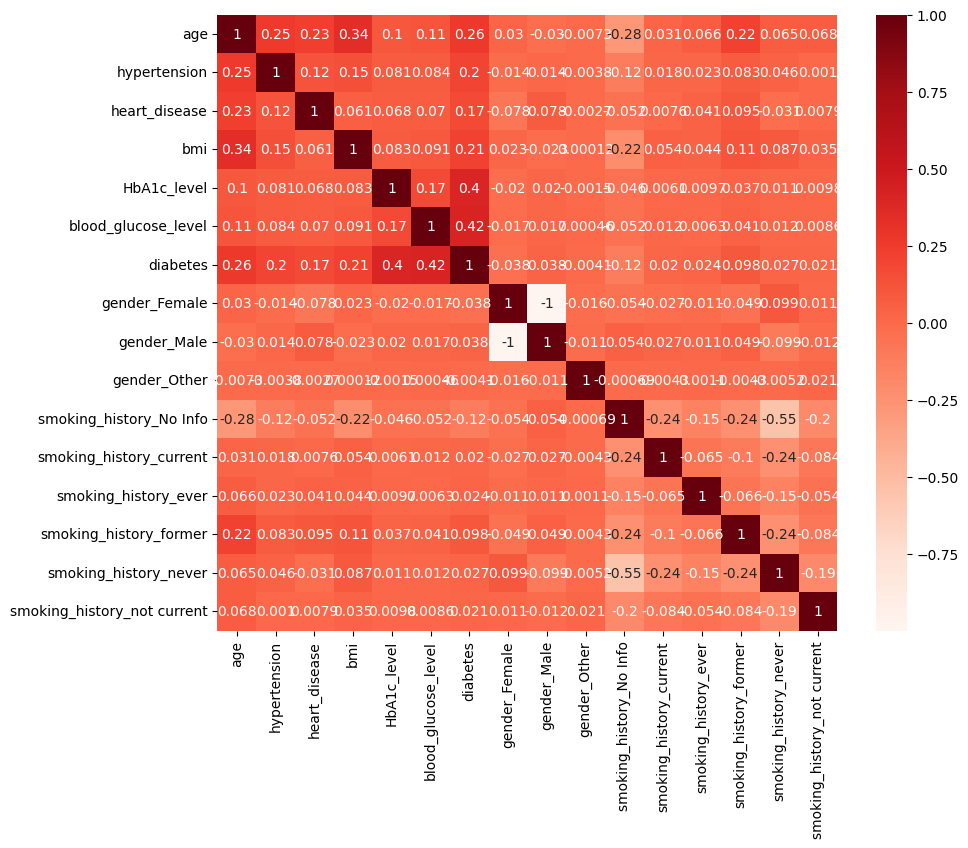

In [63]:
# correlation of my data
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation

numerical_df = df.select_dtypes(include='number')

# Create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numerical_df.corr(), cmap='Reds', annot=True)


In [ ]:
#input | output
df.columns

In [ ]:
x=df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level',
       'gender_Female', 'gender_Male', 'gender_Other',
       'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current']]

In [ ]:
y=df[['diabetes']]

In [ ]:
#train,test datasets
x_train=x[0:80000]
y_train=y[0:80000]
x_test=x[80000:100000]
y_test=y[80000:100000]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Convert all column names to strings
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

# Now try fitting the model again
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100
